<a href="https://colab.research.google.com/github/ParsaMohammadpour/face-recognition/blob/main/face_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [ ]:
from mtcnn import MTCNN
from keras_facenet import FaceNet
import cv2
import numpy as np
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import os
import sys

# defining our face validation class & it's functions

In [ ]:
class FaceValidation():
    def __init__(self):
        self.detector = MTCNN()
        self.fn = FaceNet()

    def show_face(self, img, face_loc):
        x1, y1, x2, y2 = face_loc
        plt.imshow(cv2.rectangle(img, (x1,y1), (x2, y2), (0, 255, 0), 2))
        plt.show()

    def face_location(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = self.detector.detect_faces(img)
        x, y, w, h = faces[0]["box"]
        x1 = abs(x)
        y1 = abs(y)
        x2 = x1+w
        y2 = y1+h
        self.show_face(img, [x1, y1, x2, y2])
        return x1, y1, x2, y2

    def detect_image_face(self, img):
        x1, y1, x2, y2 = self.face_location(img)
        face = img[y1:y2, x1:x2]
        return face

    def face_process(self, face):
        face = np.expand_dims(face, axis = 0)
        return face

    def encode_face(self, face):
        encode = self.fn.embeddings(face)[0]
        return encode

    def cosin_distance(self, enc1, enc2):
        return cosine(enc1,enc2)

    def euclid_distance(self, enc1, enc2):
        return np.linalg.norm(enc1-enc2)

    def is_same(self, path1, path2):
        img1 = cv2.imread(path1)
        face1 = self.detect_image_face(img1)
        face1 = self.face_process(face1)
        enc1 = self.encode_face(face1)

        img2 = cv2.imread(path2)
        face2 = self.detect_image_face(img2)
        face2 = self.face_process(face2)
        enc2 = self.encode_face(face2)
        return self.cosin_distance(enc1,enc2) < 0.6


fv = FaceValidation()

# defining functions for blocking logs

In [ ]:
# Disable
def blockPrint():
    sys._jupyter_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys._jupyter_stdout

# same verification

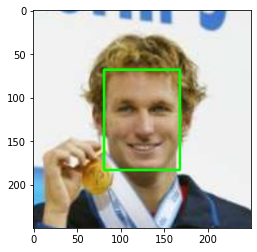

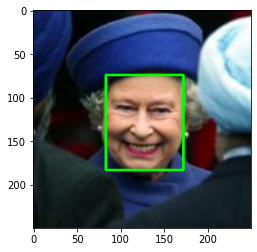

different.


In [ ]:
PATH1 = 'train\Aaron_Peirsol\Aaron_Peirsol_0001.jpg'
# PATH2 = 'train\Aaron_Peirsol\Aaron_Peirsol_0002.jpg'
# PATH1 = 'train\Queen_Elizabeth_II\Queen_Elizabeth_II_0004.jpg'
PATH2 = 'train\Queen_Elizabeth_II\Queen_Elizabeth_II_0009.jpg'

# different
blockPrint()
res = 'same.' if fv.is_same(PATH1,PATH2) else 'different.'
enablePrint()
print(res)

# different verification

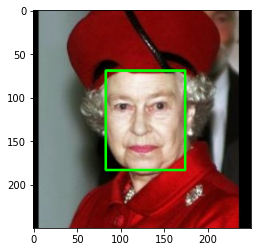

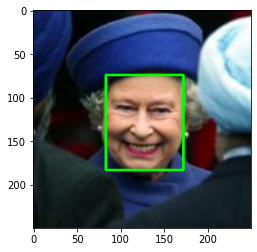

same.


In [ ]:
# PATH1 = 'train\Aaron_Peirsol\Aaron_Peirsol_0001.jpg'
# PATH2 = 'train\Aaron_Peirsol\Aaron_Peirsol_0002.jpg'
PATH1 = 'train\Queen_Elizabeth_II\Queen_Elizabeth_II_0004.jpg'
PATH2 = 'train\Queen_Elizabeth_II\Queen_Elizabeth_II_0009.jpg'

# same
blockPrint()
res = 'same.' if fv.is_same(PATH1,PATH2) else 'different.'
enablePrint()
print(res)